In [1]:
# qqplot-->

In [2]:
 # gmean fonksşyponu geometrik ortalama bulmak için bullanalıan kütüphane

In [3]:
from scipy.stats import gmean
import math

import pandas as pd
icu =pd.read_csv("ICUData.csv")

math.log(gmean(icu.bilirubin))

2.8473262538107837

In [4]:
from statistics import mean
import numpy as np
mean(np.log(icu.bilirubin))

2.847326253810784

In [5]:
np.exp(mean(np.log(icu.bilirubin)))

17.24162043918728

In [6]:
gmean(icu.bilirubin)

17.241620439187272

In [7]:
# örneklem iyi seçildiyse popülasyonun dağılımı hakkında bilgi söyleyebiriz.

In [8]:
from statistics import variance, stdev
variance(icu.temperature)
stdev(icu.temperature)

1.7354738543112644

In [9]:
#ortalama 15 std 10sa  veriler arasında çok farklar var demek.
#aritmetik ort = medyan ( yada yakın)  verielr ortalama etrafına yakın dağılır.

In [10]:
stdev(icu.temperature)   # standart sapması

1.7354738543112644

In [11]:
# medyan mutlak sapması
from statsmodels import robust
robust.mad(icu.temperature)

1.1860817748044774

In [12]:
# sıcaklık dağılımı aritmetik ortalma aerrafınd anırmal dağolmıyır .
# std sapmayı bozan aykırı değerler vardır.
#

In [13]:
# değişim katsayısı
stdev(icu.temperature) / mean(icu.temperature)  # cv

0.046078767983370086

In [14]:
from statistics import median
robust.mad(icu.temperature)/median(icu.temperature)

0.03146105503460152

In [15]:
from scipy.stats import iqr
iqr(icu.temperature) / median(icu.temperature)

0.03978779840848806

In [16]:
# çarpık veriler 

In [17]:
from scipy.stats import skew  # veri dağılımı sola çarpık - çıktı (skew=0 normal dağılım = simetrik)
skew(icu.temperature)

-8.800959897847758

In [18]:
icu.temperature[397]   # çıktısı 9.1
# 9.1 değerine sahip olan veriyi göstermesini istiyoruz.
icu[icu["temperature"]== 9.1]

,ID,sex,age,surgery,heart rate,temperature,bilirubin,SAPS II,liver failure,LOS,outcome
397,398,male,81,other,123.0,9.1,20.23374,99,0,1,died


In [19]:
skew(icu.temperature.drop(397))   # aykırı kaydı silip ....

0.31523806699087253

In [20]:
stdev(icu.temperature.drop(397))

1.1731873166428928

In [21]:
skew(icu.LOS)  # sağa çarpık.

4.895505496636184

In [22]:
# basıklık (kurtosis)
from scipy.stats import kurtosis
kurtosis(icu.temperature) #0> daha dik

145.05652943229478

In [23]:
kurtosis(icu.temperature.drop(397))

0.3566105994244779

In [24]:
kurtosis(icu.LOS)  # kurtosis >0 

33.74164008536902

In [25]:
# histogram grafik.... y ekseni frekans 

<AxesSubplot:xlabel='temperature', ylabel='Count'>

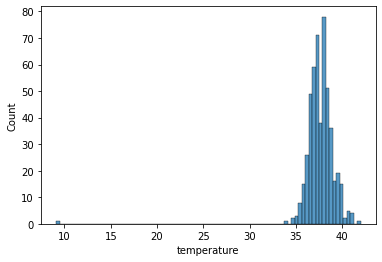

In [26]:
import seaborn as sns   # histogram grafik çizim kütüphanesi
sns.histplot(icu.temperature)

[(33.0, 43.0),
 Text(0.5, 0, 'Maximum Body Temperature'),
 Text(0, 0.5, 'Absolute Frequency'),
 Text(0.5, 1.0, '500 ICU Patients')]

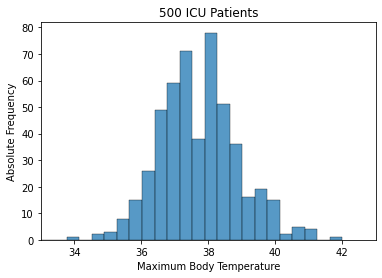

In [27]:
hst=sns.histplot(icu.temperature)
hst.set(xlim=(33,43),xlabel="Maximum Body Temperature",
       ylabel="Absolute Frequency", title="500 ICU Patients")

[Text(0.5, 0, 'Long of Stay inDays'),
 Text(0, 0.5, 'Absolute Frequency'),
 Text(0.5, 1.0, '500 ICU Patients')]

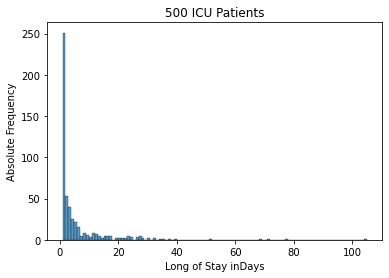

In [28]:
hst = sns.histplot(icu.LOS, binwidth=1)   # bindwith her bir kutucuğun genişliğini ayarlar.
hst.set(xlabel="Long of Stay inDays",
       ylabel="Absolute Frequency",title="500 ICU Patients")

<AxesSubplot:xlabel='temperature', ylabel='Density'>

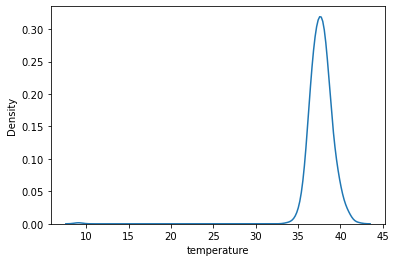

In [29]:
# tahmini yoğunlukalr   --> kutucuk sayısından etkilenmiyor.

sns.kdeplot(icu.temperature)